In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Loading the dataset:

In [60]:
data=pd.read_csv("Clean_Dataset.csv")
data

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


#Data Exploration

In [61]:
data.airline.value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [62]:
data.source_city.value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [63]:
data.destination_city.value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

In [64]:
data["class"].value_counts()

class
Economy     206666
Business     93487
Name: count, dtype: int64

In [65]:
data["duration"].median()

11.25

In [66]:
data["duration"].min()

0.83

#Data Preparation

In [67]:
data=data.drop("Unnamed: 0",axis=1)

In [68]:
data=data.drop("flight",axis=1)

In [69]:
data=pd.get_dummies(data,columns=["airline"])

In [70]:
data["class"]=data["class"].map({"Economy":0,"Business":1})

In [71]:
data.stops.value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

In [72]:
data.stops=pd.factorize(data.stops)[0]

In [73]:
data

,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara
0,Delhi,Evening,0,Night,Mumbai,0,2.17,1,5953,False,False,False,False,True,False
1,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1,5953,False,False,False,False,True,False
2,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1,5956,True,False,False,False,False,False
3,Delhi,Morning,0,Afternoon,Mumbai,0,2.25,1,5955,False,False,False,False,False,True
4,Delhi,Morning,0,Morning,Mumbai,0,2.33,1,5955,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,Chennai,Morning,1,Evening,Hyderabad,1,10.08,49,69265,False,False,False,False,False,True
300149,Chennai,Afternoon,1,Night,Hyderabad,1,10.42,49,77105,False,False,False,False,False,True
300150,Chennai,Early_Morning,1,Night,Hyderabad,1,13.83,49,79099,False,False,False,False,False,True
300151,Chennai,Early_Morning,1,Evening,Hyderabad,1,10.00,49,81585,False,False,False,False,False,True


In [75]:
data=pd.get_dummies(data,columns=["source_city"])

In [77]:
data=pd.get_dummies(data,columns=["destination_city"])

In [79]:
data=pd.get_dummies(data,columns=["departure_time"])

In [84]:
data=pd.get_dummies(data,columns=["arrival_time"])

KeyError: "None of [Index(['arrival_time'], dtype='object')] are in the [columns]"

#Training the Model

In [88]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X,y=data.drop("price",axis=1),data["price"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [90]:
model=RandomForestRegressor(n_jobs=-1)
model.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1)

#Model Validation

In [92]:
model.score(X_test,y_test)

0.9852819773922561

In [108]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import math

y_pred=model.predict(X_test)
print("R2:",r2_score(y_test,y_pred))
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))
print("RMSE:",math.sqrt(mean_squared_error(y_test,y_pred)))

R2: 0.9852819773922561
MAE: 1067.2527870980284
MSE: 7580659.160825911
RMSE: 2753.2996859815153


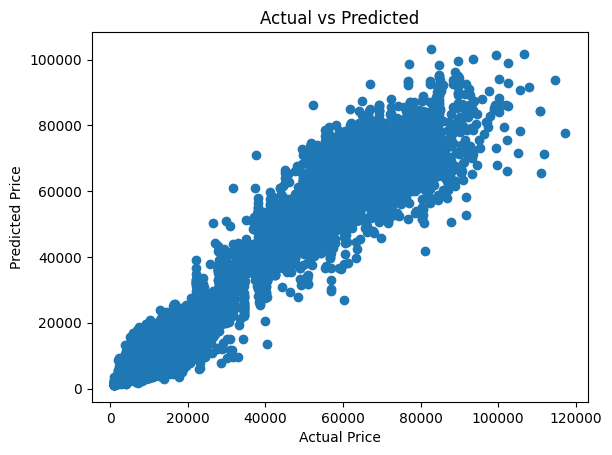

In [110]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted")
plt.show()

In [114]:
importances=dict(zip(model.feature_names_in_,model.feature_importances_))
sorted_importances=sorted(importances.items(),key=lambda x:x[1],reverse=True)
sorted_importances

[('class', 0.8796471761053503),
 ('duration', 0.05751230057942985),
 ('days_left', 0.01856793797722019),
 ('airline_Air_India', 0.00505983023666786),
 ('airline_Vistara', 0.004993973216439167),
 ('source_city_Delhi', 0.0037686675294419303),
 ('destination_city_Delhi', 0.003402070733607661),
 ('source_city_Mumbai', 0.002251808174040189),
 ('destination_city_Kolkata', 0.0019283980116631904),
 ('source_city_Kolkata', 0.0018677180673958881),
 ('destination_city_Mumbai', 0.001826175531557716),
 ('stops', 0.00180012968020348),
 ('arrival_time_Evening', 0.001648380939177265),
 ('destination_city_Hyderabad', 0.001517320187552573),
 ('destination_city_Bangalore', 0.0013049800811859148),
 ('source_city_Hyderabad', 0.0012228581350391384),
 ('arrival_time_Night', 0.0010878315601534994),
 ('departure_time_Evening', 0.0010849501259548723),
 ('source_city_Bangalore', 0.0010779657211926676),
 ('arrival_time_Afternoon', 0.0009577408237270784),
 ('source_city_Chennai', 0.0009159544723533819),
 ('departu

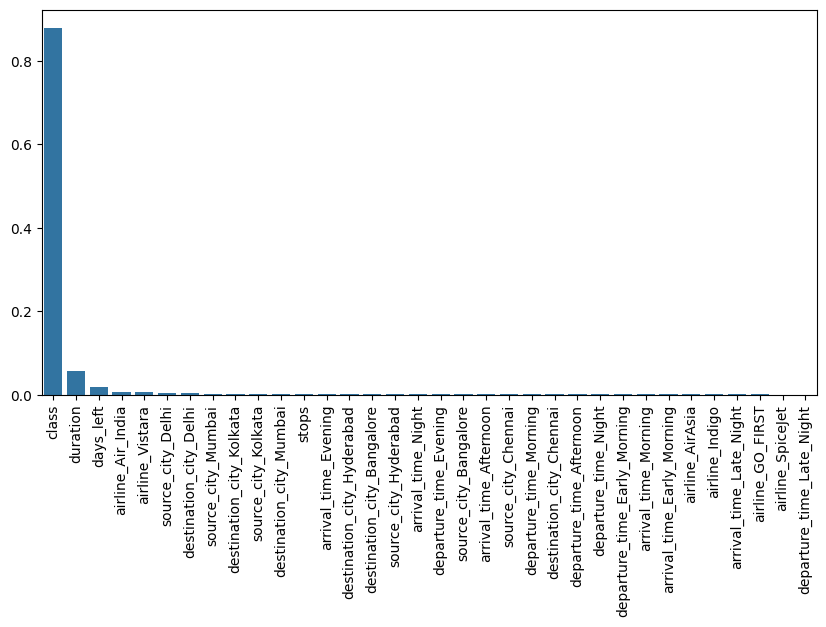

In [122]:
plt.figure(figsize=(10,5))
sns.barplot(x=list(map(lambda x:x[0],sorted_importances)),y=list(map(lambda x:x[1],sorted_importances)))
plt.xticks(rotation=90)
plt.show()

#Hyperparameter Tuning

In [124]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist={
    'n_estimators':randint(100,1000),
    'max_depth':[None,10,20,30,40,50],
    'min_samples_split':randint(2,20),
    'min_samples_leaf':randint(1,10),
    'max_features': [1.0, 'auto', 'sqrt', 'log2', None],
}
model=RandomForestRegressor(n_jobs=-1)
random_search=RandomizedSearchCV(estimator=model,param_distributions=param_dist,n_iter=2,cv=3,n_jobs=-1,scoring="neg_mean_squared_error",verbose=2,random_state=10)
random_search.fit(X_train,y_train)
best_regressor=random_search.best_estimator_
best_regressor

Fitting 3 folds for each of 2 candidates, totalling 6 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomForestRegressor(max_depth=40, max_features='auto', min_samples_split=19,
                      n_estimators=108, n_jobs=-1)

In [125]:
best_regressor.score(X_test,y_test)

0.9861797145957345

In [127]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import math

y_pred=best_regressor.predict(X_test)
print("R2:",r2_score(y_test,y_pred))
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))
print("RMSE:",math.sqrt(mean_squared_error(y_test,y_pred)))

R2: 0.9861797145957345
MAE: 1163.955574814209
MSE: 7118270.9761534445
RMSE: 2668.0088036124325


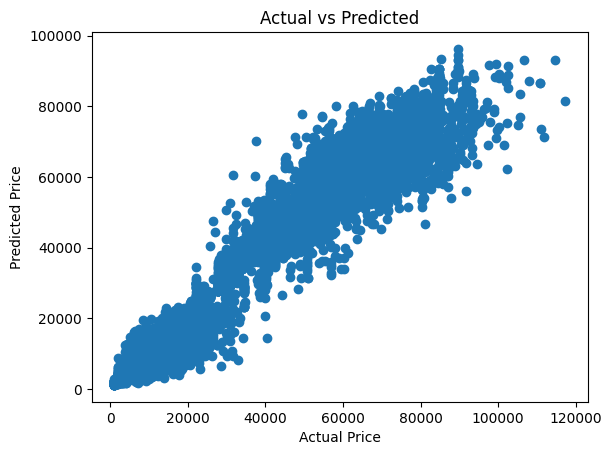

In [129]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted")
plt.show()